In [4]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\vivek\Data science projects\Data-Science-Project-Portfolio\DIABETES\data\diabetes.csv'

df = pd.read_csv(file_path)

print('First 5 rows of the dataset:')
print(df.head())

print('\nDataset Info:')
df.info()

print(f'\nDataset Shape: {df.shape}')

print('\nMissing Values:')
print(df.isnull().sum())

zero_counts = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].eq(0).sum()
print('\nZero Values in Key Columns:')
print(zero_counts)


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [6]:
print('Summary Statistics:')
print(df.describe())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000


Class Distribution (Outcome):
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


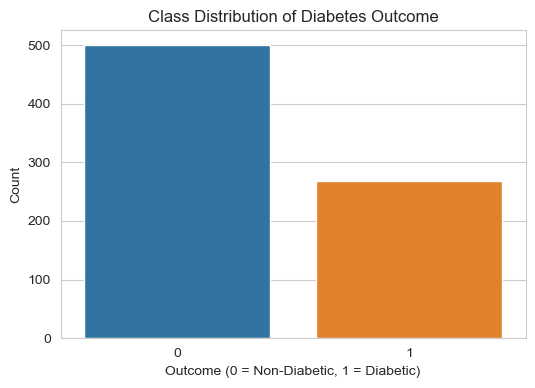

In [7]:
print('\nClass Distribution (Outcome):')
print(df['Outcome'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

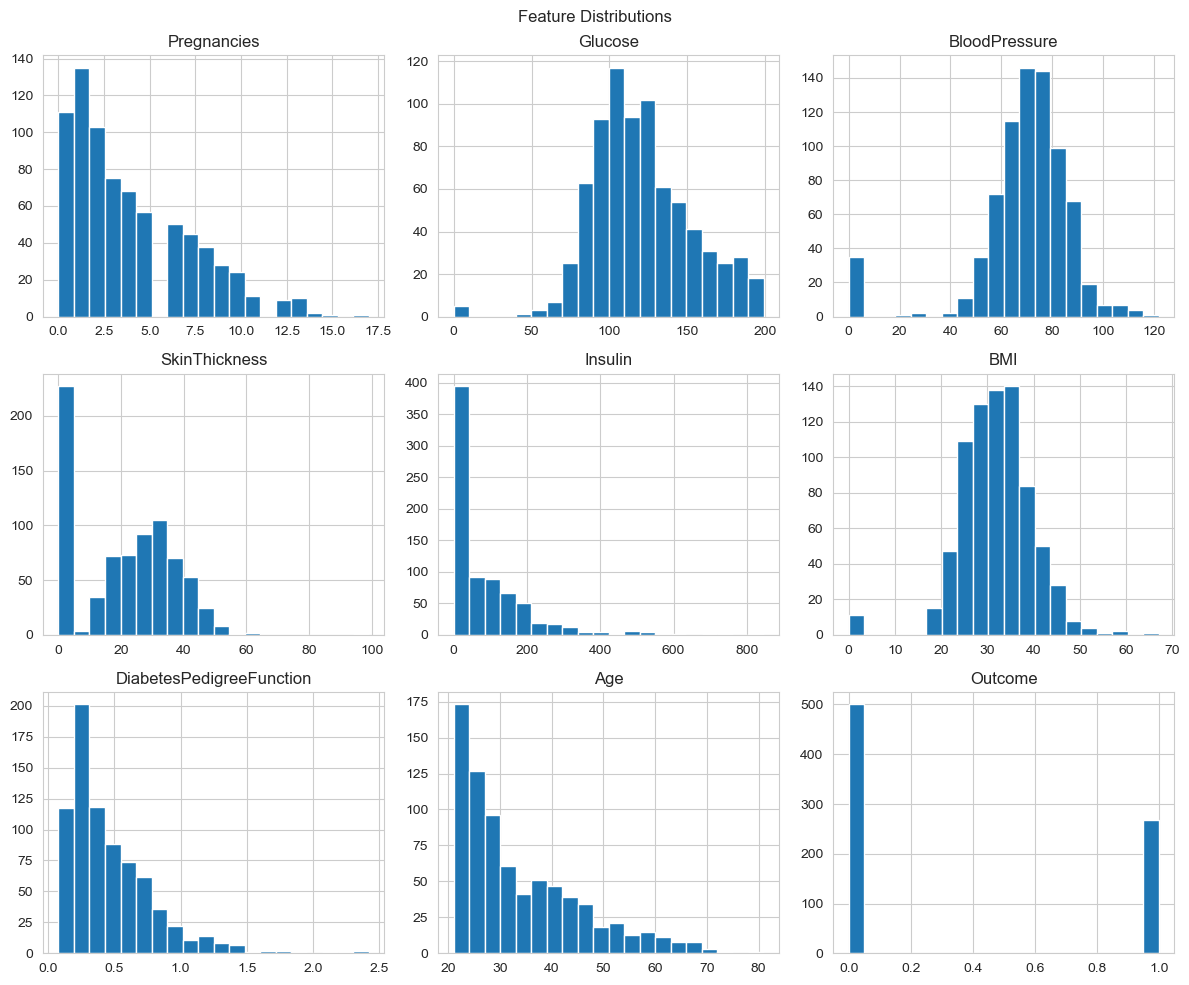

In [8]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

Correlation Matrix:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose                      

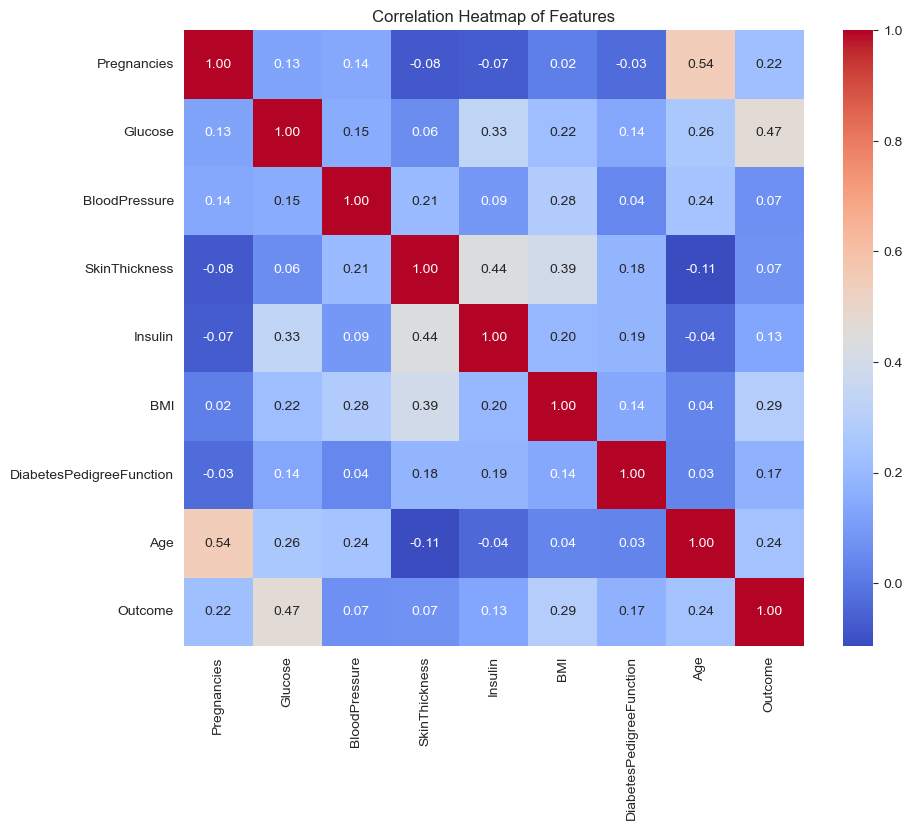

In [10]:
corr_matrix = df.corr()

print('Correlation Matrix:')
print(corr_matrix.round(2)) 

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()



Proportion of Zero Values in Key Columns:
Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64


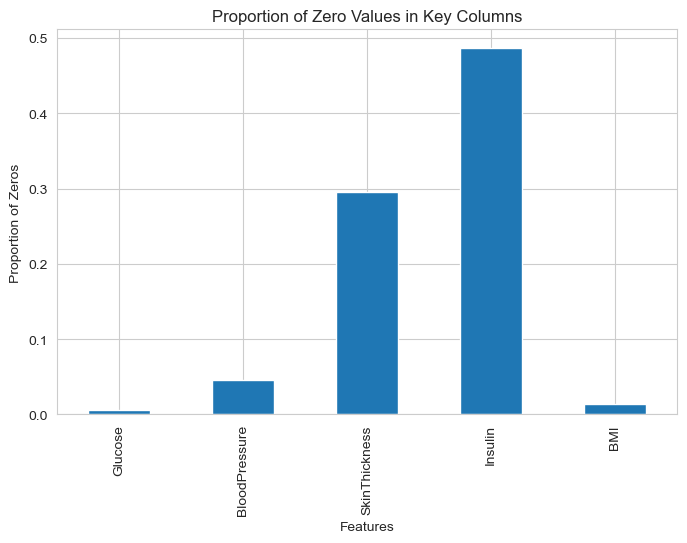

In [11]:
zero_proportions = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].eq(0).mean()
print('\nProportion of Zero Values in Key Columns:')
print(zero_proportions)

plt.figure(figsize=(8, 5))
zero_proportions.plot(kind='bar')
plt.title('Proportion of Zero Values in Key Columns')
plt.xlabel('Features')
plt.ylabel('Proportion of Zeros')
plt.show()